In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

import pickle

In [21]:
df = pd.read_csv('data/cleaned_data.csv')

In [22]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

In [23]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [24]:

# random forest model creation
rfc = RandomForestClassifier(n_estimators=9)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [25]:
#Using pickle operation to serialize Logistic regression and save the serialized format to a file
# filename = 'finalized_random_forest.sav'
# pickle.dump(rfc, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))
# rfc_predict = loaded_model.predict(X_test)

In [26]:
print("Random forest model accuracy(in %):", metrics.accuracy_score(y_test, rfc_predict)*100)

Random forest model accuracy(in %): 89.14285714285714


In [27]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=var)
    rfc = RandomForestClassifier(n_estimators=9)
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    score = metrics.accuracy_score(y_test, rfc_predict)*100
    if (score > max):
        max = score
    average_accuracy += score

In [28]:
print(average_accuracy/542)
print (max)

87.1027938850817
93.14285714285714


[[104  12]
 [ 10  49]]


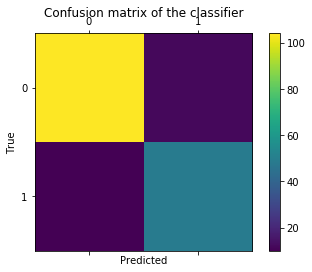

In [29]:
#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, rfc_predict)
fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()